In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# $Ax=b$

In [15]:
A = np.array([[3,1],[1,3]],dtype=float)
b = np.array([5,7],dtype=float)
print(A)

[[3. 1.]
 [1. 3.]]
0.3333333333333333


In [50]:
# Jacobi's method
def Jacobi(A,b,num_of_iterations,x):  
    n = len(b)
    N = np.eye(n)
    # Change diagonal elements into 1
    for i in range(n):
        b[i] /= A[i,i]
        A[i,:] /= A[i,i]

    P = N-A
    M_norm = np.linalg.norm(P,ord=1)
    
    
    # Check wether the method converges
    if M_norm>=1:
        print('Jacobi will not converge')
    else:
        error_ls = []
        for i in range(num_of_iterations):
            x = np.dot(P,x)+b
            # Plot n against error
#             x_true = np.array([1,2],dtype=float)
#             error = np.linalg.norm(x_true-x,ord=1)
#             error_ls.append(error)


#         plt.semilogy(np.arange(num_of_iterations),
#                             error_ls,'bx',label=r'$\log(\||e\||)$')
#         plt.legend()
    return x

[1. 2.]


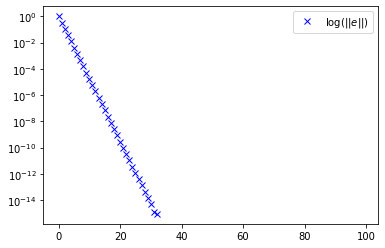

In [44]:
x = np.array([0,0],dtype=float)
x = Jacobi(A,b,100,x)
print(x)

In [57]:
# Gauss-Seidel Method
x = np.array([0,0],dtype=float)
num_of_iterations = 10

def Gauss_Seidel(A,b,x,num_of_iterations):
    n = len(b)
    # Change diagonal elements into 1
    for i in range(n):
        b[i] /= A[i,i]
        A[i,:] /= A[i,i]

    
    AL = np.tril(-A,-1)
    AU = np.triu(-A,1)
    N = np.eye(n)-AL
    M_norm = np.linalg.norm(np.dot(np.linalg.inv(N),AU))
    
    if M_norm>=1:
        print('Can not convergent')
    else:
        for i in range(num_of_iterations):
            x_copy = x.copy()
            for j in range(n):
                x[j] = np.dot(AL[j,:],x)+np.dot(AU[j,:],x_copy)+b[j]
    return x      
    

In [58]:
Gauss_Seidel(A,b,x,num_of_iterations)

array([1., 2.])